# League of Legends Match Data — Exploratory Data Analysis

This notebook explores the Kaggle dataset of 51k ranked EUW matches.  
We will check dataset structure, missing values, and relationships between early objectives and match outcome.  

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../data/games.csv")  # adjust path if needed
print("Shape:", df.shape)
df.head()

Shape: (51490, 61)


,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


## 1. Dataset Info
Check column names, types, and a quick overview of the dataset.

In [10]:
print(df.columns.tolist())
df.info()

['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id', 't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1', 't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2', 't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id', 't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1', 't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4', 't2_ban5']
<class 'pandas.core.frame.DataF

## 2. Missing Values
Check if any columns have missing or null entries.

In [12]:
df.isna().sum().sort_values(ascending=False).head(20)

gameId            0
t1_ban1           0
t1_ban3           0
t1_ban4           0
t1_ban5           0
t2_champ1id       0
t2_champ1_sum1    0
t2_champ1_sum2    0
t2_champ2id       0
t2_champ2_sum1    0
t2_champ2_sum2    0
t2_champ3id       0
t2_champ3_sum1    0
t2_champ3_sum2    0
t2_champ4id       0
t2_champ4_sum1    0
t2_champ4_sum2    0
t2_champ5id       0
t2_champ5_sum1    0
t2_champ5_sum2    0
dtype: int64

## 3. Winner Distribution
How balanced are wins between Team 1 and Team 2?

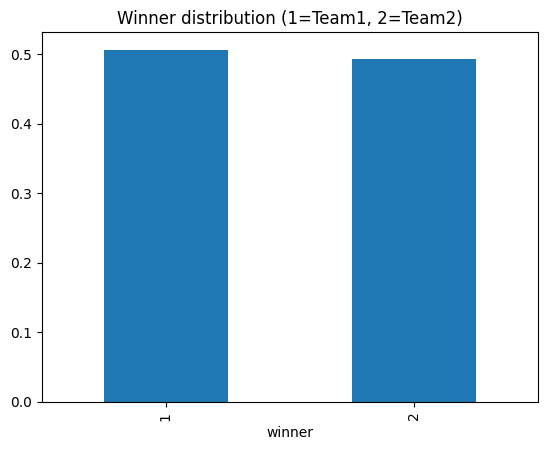

In [14]:
df['winner'].value_counts(normalize=True)
df['winner'].value_counts(normalize=True).plot(kind='bar', title="Winner distribution (1=Team1, 2=Team2)")
plt.show()

## 4. Objectives and Win Probability
How does securing first objectives (Blood, Tower, Dragon, Baron, etc.) affect win rate?

In [16]:
objectives = ['firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald']

for obj in objectives:
    if obj in df.columns:
        p_team1 = (df[df[obj] == 1]['winner'] == 1).mean()
        p_team2 = (df[df[obj] == 2]['winner'] == 1).mean()
        print(f"{obj}: if Team1 got -> P(Team1 wins)={p_team1:.2f}, if Team2 got -> P(Team1 wins)={p_team2:.2f}")

firstBlood: if Team1 got -> P(Team1 wins)=0.59, if Team2 got -> P(Team1 wins)=0.41
firstTower: if Team1 got -> P(Team1 wins)=0.71, if Team2 got -> P(Team1 wins)=0.29
firstInhibitor: if Team1 got -> P(Team1 wins)=0.91, if Team2 got -> P(Team1 wins)=0.09
firstBaron: if Team1 got -> P(Team1 wins)=0.81, if Team2 got -> P(Team1 wins)=0.20
firstDragon: if Team1 got -> P(Team1 wins)=0.69, if Team2 got -> P(Team1 wins)=0.33
firstRiftHerald: if Team1 got -> P(Team1 wins)=0.69, if Team2 got -> P(Team1 wins)=0.31


## 5. Visualizing Objective Impact
Bar charts for probability of Team 1 winning depending on who got each objective first.

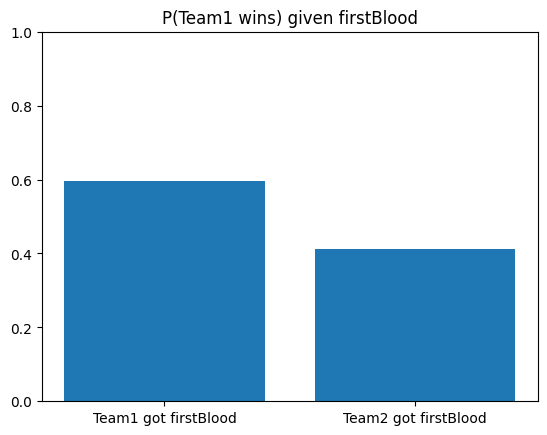

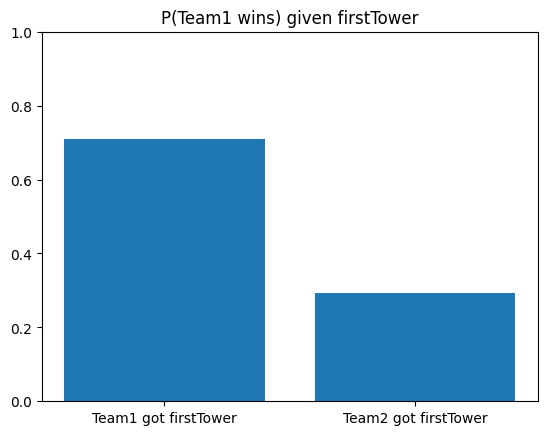

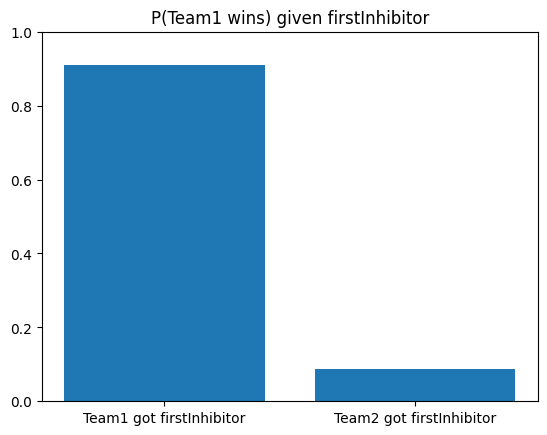

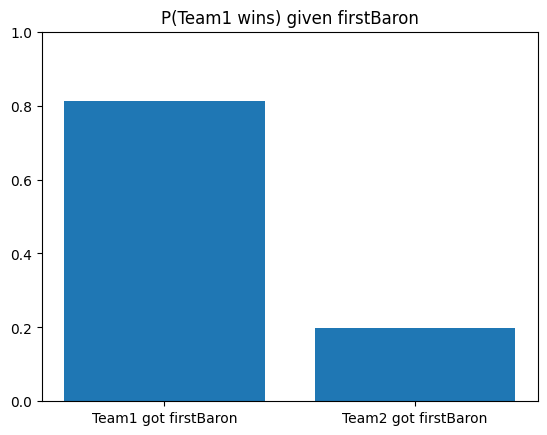

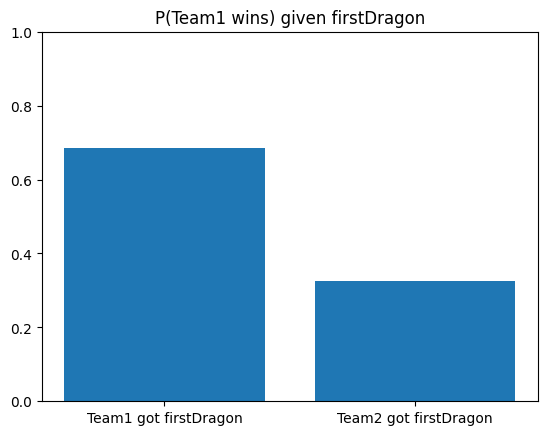

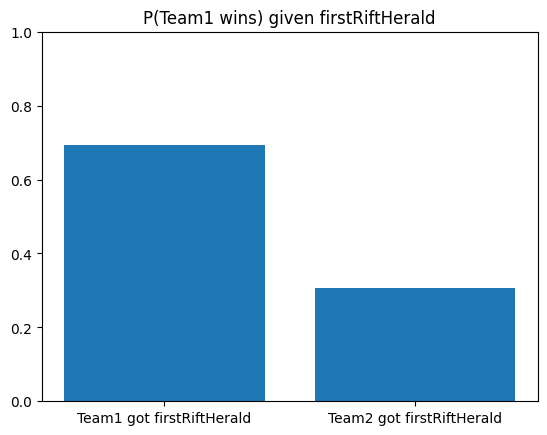

In [18]:
for obj in objectives:
    if obj in df.columns:
        rates = []
        labels = []
        for val in [1,2]:
            subset = df[df[obj]==val]
            rate = (subset['winner'] == 1).mean()
            rates.append(rate)
            labels.append(f"Team{val} got {obj}")
        plt.bar(labels, rates)
        plt.title(f"P(Team1 wins) given {obj}")
        plt.ylim(0,1)
        plt.show()